PyTorch’s autograd module automates gradient computation, which is essential for deep learning and optimization.

# **1. Basics of autograd**

The core idea is that PyTorch tracks operations on tensors with requires_grad=True, allowing automatic differentiation using backpropagation

**Computing Derivatives**

image.png

In [1]:
import torch

x = torch.tensor(2.0, requires_grad=True)  # Enable autograd
y = x ** 2  # y = x^2
y.backward()  # Compute dy/dx
print(x.grad)  # Output: tensor(4.)


tensor(4.)


**Explanation:**



y = x^2

dy/dx = 2x = 2(2) = 4

x.grad stores the gradient.

**Back Propogation**

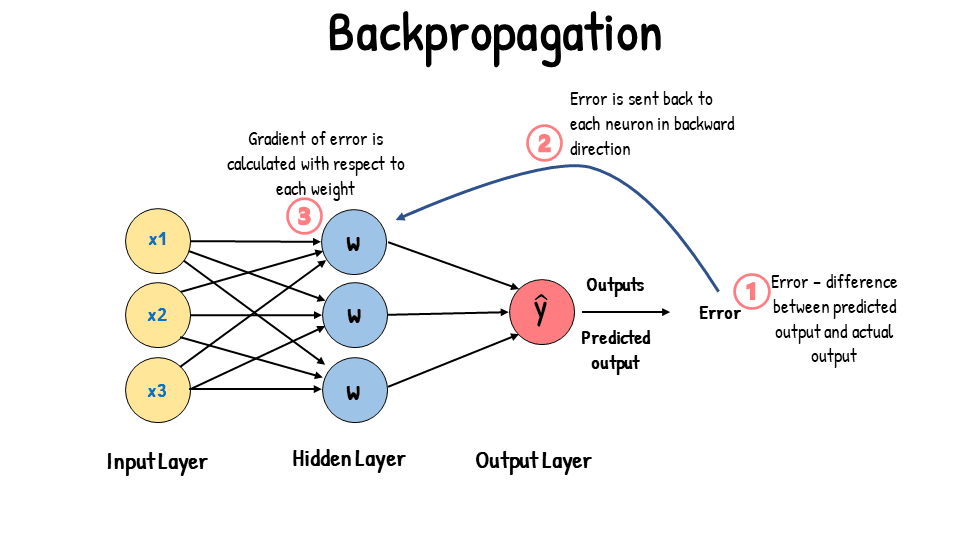

# **2. Computing Gradients for Vectors**

For vector outputs, PyTorch requires a gradient vector to compute the Jacobian.

In [2]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
y = x ** 2  # Element-wise square
y.backward(torch.tensor([1.0, 1.0]))  # Custom gradient (dL/dy)
print(x.grad)  # Output: tensor([4., 6.])


tensor([4., 6.])


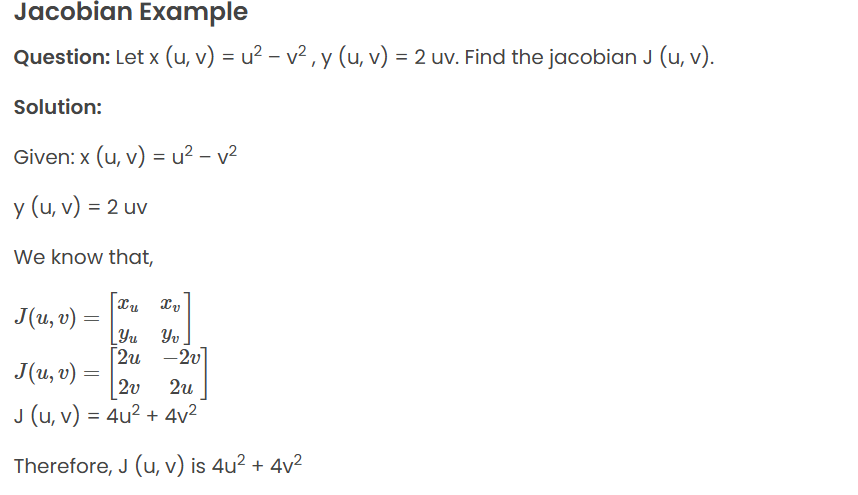

* The gradient argument helps compute weighted derivatives.

# **3. Stopping Gradient Computation**

In some cases, we don’t want to track gradients:



* **Temporarily disable autograd** with torch.no_grad()

* **Detach a tensor** from the computation graph

**Using torch.no_grad()**

In [3]:
x = torch.tensor(3.0, requires_grad=True)
with torch.no_grad():
    y = x ** 2
print(y.requires_grad)  # Output: False


False


# **Using .detach()**



In [4]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y_detached = y.detach()  # Removes gradient tracking
print(y_detached.requires_grad)  # Output: False


False


# **4. Computing Gradients for Multiple Variables**

**Chain Rule (Backpropagation)**

In [5]:
x = torch.tensor(2.0, requires_grad=True)
z = x ** 3 + 3 * x  # z = x^3 + 3x
z.backward()  # Compute dz/dx
print(x.grad)  # Output: tensor(15.)  (3x^2 + 3)


tensor(15.)


* dz/dx = 3x^2 + 3 = 3(2)^2 + 3 = 15



# **5. Zeroing Out Gradients**

PyTorch accumulates gradients, so you must reset them before a new computation.

In [8]:
x = torch.tensor(2.0, requires_grad=True)

for _ in range(2):
    y = x ** 2 # 2x, 2
    y.backward()
    print(x.grad)  # Gradients accumulate

    x.grad.zero_()  # Reset gradients


tensor(4.)
tensor(4.)


In [9]:
x = torch.tensor(2.0, requires_grad=True)

for _ in range(2):
    y = x ** 2 # 2x, 2
    y.backward()
    print(x.grad)  # Gradients accumulate

    #x.grad.zero_()  # Reset gradients

tensor(4.)
tensor(8.)


# **6. Higher-Order Gradients (Second Derivatives)**

PyTorch supports computing second derivatives by setting create_graph=True.

In [10]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 3  # y = x^3
dy_dx = torch.autograd.grad(y, x, create_graph=True)[0]  # dy/dx = 3x^2
d2y_dx2 = torch.autograd.grad(dy_dx, x)[0]  # d²y/dx² = 6x
print(d2y_dx2)  # Output: tensor(12.)


tensor(12.)


# **7. Summary**

* requires_grad=True enables autograd.

* .backward() computes gradients.

* Use torch.no_grad() or .detach() to stop tracking gradients.

* Always zero out gradients before computing new ones.

* PyTorch supports higher-order gradients (Hessian, Jacobian).

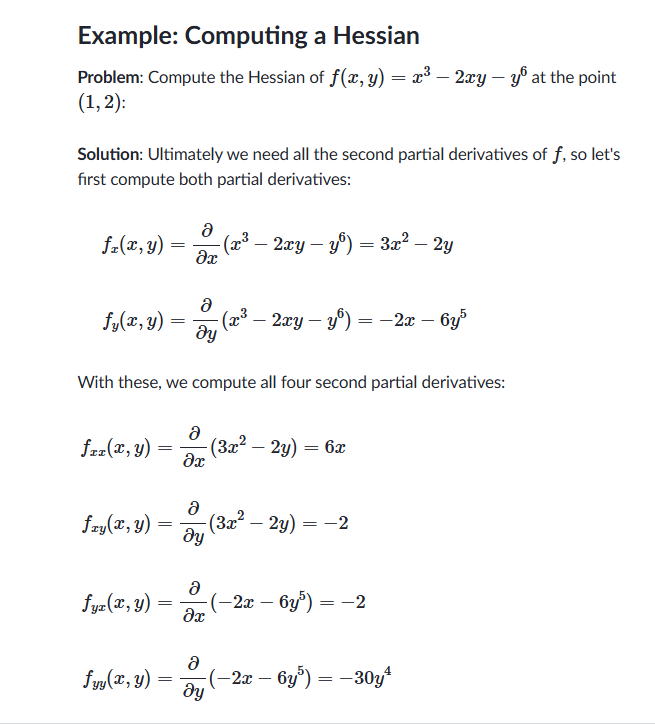

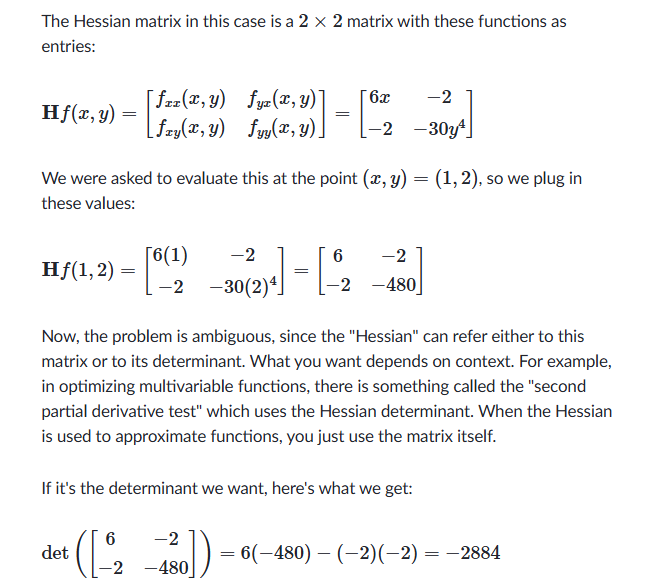